# Regression

## Setup

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

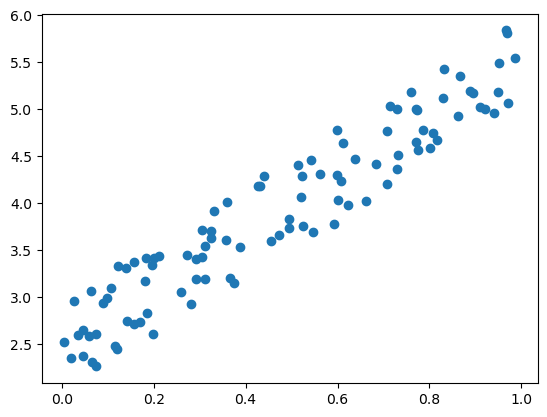

In [28]:
# Random seed for noise
np.random.seed(42)
# No. of data
m = 100
X = 1 * np.random.rand(m, 1)
# 2 + 3X with gausian noise
y = 2 + 3 * X + np.random.rand(m, 1)

fig, ax = plt.subplots()
ax.scatter(X, y)

## Model

The most basic form of regression model is a linear equation.

for 1 parameter

$ f_{w, b}(x^{(i)}) = wx^{(i)} + b $

for multiple parameters

$ f_{w, b}(x^{(i)}) = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b $

or in vectorized form

$ f_{w, b}(x^{(i)}) = X^T w + b $

- $f_{w, b}(x^{(i)})$ : hypothesis function
- $X$ : features
- $w$ : weight
- $b$ : bias unit

In [29]:
# Every X features multiply with w weights and add bias unit b
def pred(X, w, b):
    return np.dot(w.T, X) + b

In [30]:
w = np.array(5).T
b = 1

y_pred = [pred(X, w, b) for X in X]

Let's plot the linear function to see if it fits the samples well.

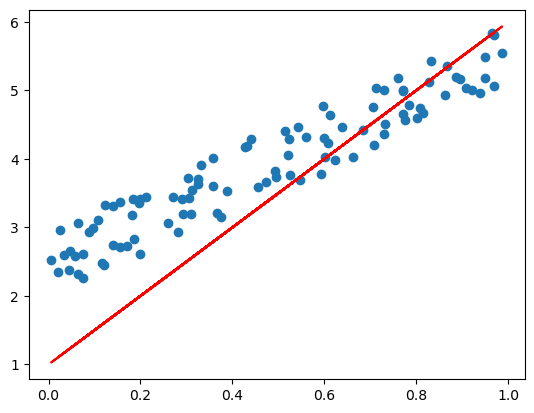

In [31]:
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X, y_pred, c='r')

Apperently it is not fit well. But how bad performance it is? Let's calculate **Error Function**

## Error Function (Cost Function)

When we fit (or train) the models we need error function to measure how well the model fit to the data. We use

**Mean square error**

Basicly it is a squared of sum of diffrent between predicted values and true values

$ J(w, b) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} \Big(f_{w, b}(x^{(i)}) - y^{(i)} \Big)^2 $

In [32]:
def error_func(model, X, y, w, b):
    y_pred = [model(X, w, b) for X in X]
    return (np.sum((y_pred - y)**2))/2*len(y)

In [33]:
error_func(pred, X, y, w, b)

3790.1971133327593

We what to minimize $J_(w,b)$ automatically.

The square in MSE equation made the graph concurve, means there is only one global minimum.

To do that we use partial derivertive to creat a tangent line, the slope of tangent line is 0 at minimum, -v at left, +v at right of the minimum.

We use this value to iteratively update $w$ this function called **gradient descent**.

$ w := w - \alpha \frac{\delta}{\delta w} J(w,b) $

Or normal equation

$ (X^{T} X)^{-1}(X^{T}y) $

In [34]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [35]:

from sklearn.preprocessing import add_dummy_feature
# Add dummy feature for initiate bias unit.
X_b = add_dummy_feature(X)

In [36]:
# Compute normal_equation
b, w = normal_equation(X_b, y)

In [37]:
y_pred = [pred(X, w, b) for X in X]

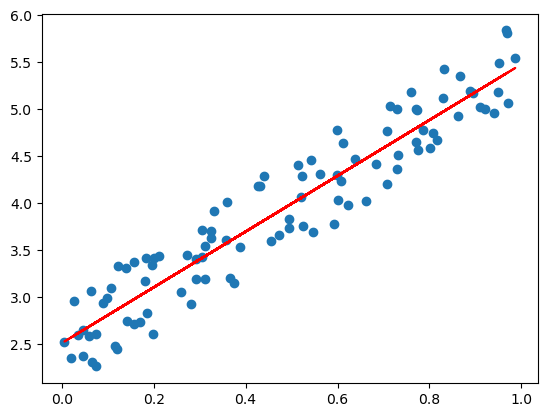

In [38]:
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X, y_pred, c='r')

Vola! It fits perfectly.

In [39]:
error_func(pred, X, y, w, b)

424.782762829687

424 is way better than 3,790